In [ ]:
#!pip install missingno

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [3]:
ls crime_data_raw/2013

apr13.xls*  dec13.xls*  jan13.xls*  jun13.xls*  may13.xls*  oct13.xls*
aug13.xls*  feb13.xls*  jul13.xls*  mar13.xls*  nov13.xls*  sep13.xls*


In [4]:
path = 'crime_data_raw/2013'

In [5]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [6]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [8]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
# Of Offenses    130459 non-null int64
Beat             130459 non-null object
Block Range      130459 non-null object
Date             130459 non-null datetime64[ns]
Hour             130459 non-null int64
Offense Type     130459 non-null object
Premise          130459 non-null object
Street Name      130459 non-null object
Suffix           130459 non-null object
Type             130459 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [10]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


In [11]:
# check if  null values
df.isnull().values.any().any()

True

In [12]:
# check su, of null values
df.isnull().values.sum()

130459

In [13]:
len(df[df.isnull().any(axis=1)])

130459

## Visualize our data

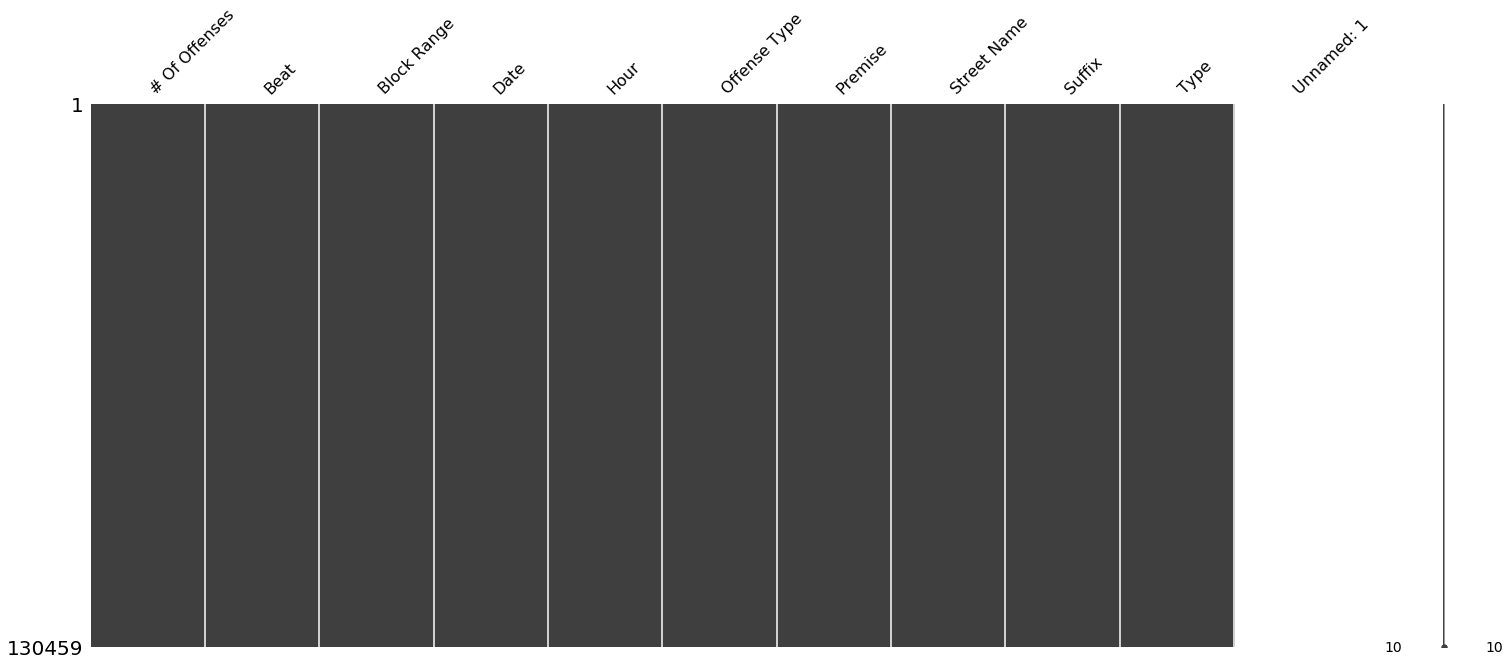

In [14]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [15]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


In [16]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
NumOffenses    130459 non-null int64
Beat           130459 non-null object
BlockRange     130459 non-null object
Date           130459 non-null datetime64[ns]
Hour           130459 non-null int64
OffenseType    130459 non-null object
Premise        130459 non-null object
StreetName     130459 non-null object
Suffix         130459 non-null object
Type           130459 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
#     'Block Range': 'BlockRange',
#     'Street Name': 'StreetName'
# }, inplace=True)
# df.info()

## Subset dataframe to work on 

In [17]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 8 columns):
Date           130459 non-null datetime64[ns]
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null int64
Hour           130459 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.0+ MB


## Find NaN
- drop if > 2 nan

In [18]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [19]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [ ]:
crimes = crimes.dropna(thresh=2)

In [20]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Joint dataframes

In [21]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130461 entries, 0 to 130460
Data columns (total 9 columns):
Date                   130459 non-null datetime64[ns]
Beat                   130459 non-null object
BlockRange             130459 non-null object
StreetName             130459 non-null object
OffenseType            130459 non-null object
Premise                130461 non-null object
NumOffenses            130459 non-null float64
Hour                   130459 non-null float64
Premise Description    129358 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.0+ MB


In [22]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2013-04-25,19G10,9400-9499,WOODFAIR,Murder,13R,1.0,5.0,ROAD/STREET/SIDEWALK
1,2013-04-19,2A20,1300-1399,29TH,Murder,13R,1.0,22.0,ROAD/STREET/SIDEWALK
2,2013-04-18,14D20,4000-4099,REDBUD,Murder,13R,1.0,21.0,ROAD/STREET/SIDEWALK
3,2013-04-20,2A60,1900-1999,ELLA,Rape,13R,1.0,20.0,ROAD/STREET/SIDEWALK
4,2013-04-06,2A50,4200-4299,KOEHLER,Rape,13R,1.0,4.0,ROAD/STREET/SIDEWALK


## Visualize data

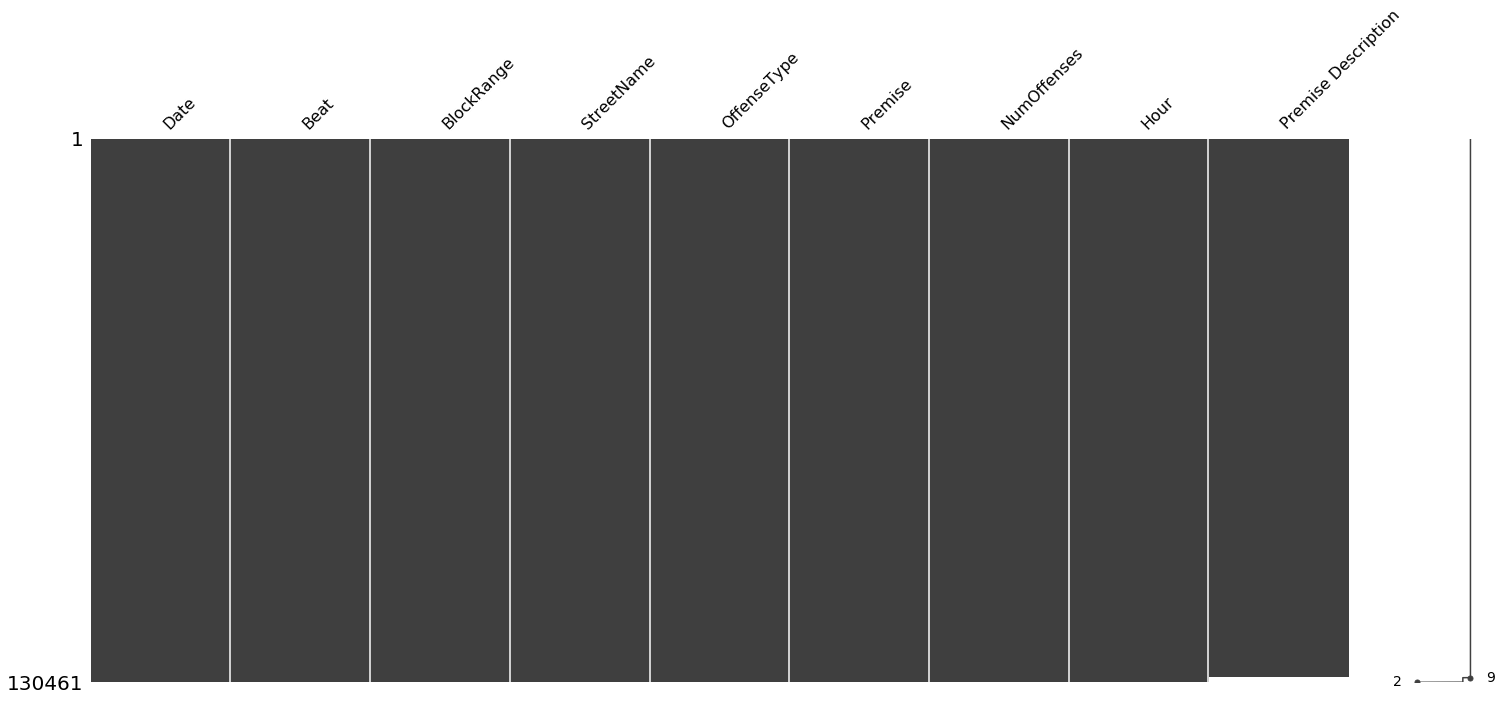

In [23]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [24]:
len(crimes[crimes.isnull().any(axis=1)])

1105

In [25]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
124086,2013-04-24,12D40,11800-11899,TEANECK,Aggravated Assault,---,1.0,22.0,NaN
124087,2013-04-22,1A20,500-599,SUL ROSS,Aggravated Assault,---,1.0,16.0,NaN
124088,2013-04-19,7C20,3500-3599,LOCKWOOD,Aggravated Assault,---,1.0,15.0,NaN
124089,2013-04-02,18F50,9200-9299,RICHMOND,Aggravated Assault,---,1.0,20.0,NaN
124090,2013-04-03,16E20,13300-13399,HIRAM CLARKE,Aggravated Assault,---,1.0,7.0,NaN
124091,2013-04-20,11H50,8500-8599,GULF,Aggravated Assault,---,1.0,1.0,NaN
124092,2013-04-09,14D10,3600-3699,IDAHO,Aggravated Assault,---,1.0,1.0,NaN
124093,2013-04-13,15E40,9400-9499,MAIN,Burglary,---,1.0,17.0,NaN
124094,2013-04-08,7C50,15700-15799,LEE,Burglary,---,1.0,19.0,NaN
124095,2013-04-18,3B10,4000-4099,WATONGA,Burglary,---,1.0,17.0,NaN


## drop rows with 2 or 3 or more NaN

In [26]:
crimes = crimes.dropna(thresh=3)

In [27]:
len(crimes[crimes.isnull().any(axis=1)])

1103

In [28]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
124086,2013-04-24,12D40,11800-11899,TEANECK,Aggravated Assault,---,1.0,22.0,NaN
124087,2013-04-22,1A20,500-599,SUL ROSS,Aggravated Assault,---,1.0,16.0,NaN
124088,2013-04-19,7C20,3500-3599,LOCKWOOD,Aggravated Assault,---,1.0,15.0,NaN
124089,2013-04-02,18F50,9200-9299,RICHMOND,Aggravated Assault,---,1.0,20.0,NaN
124090,2013-04-03,16E20,13300-13399,HIRAM CLARKE,Aggravated Assault,---,1.0,7.0,NaN
124091,2013-04-20,11H50,8500-8599,GULF,Aggravated Assault,---,1.0,1.0,NaN
124092,2013-04-09,14D10,3600-3699,IDAHO,Aggravated Assault,---,1.0,1.0,NaN
124093,2013-04-13,15E40,9400-9499,MAIN,Burglary,---,1.0,17.0,NaN
124094,2013-04-08,7C50,15700-15799,LEE,Burglary,---,1.0,19.0,NaN
124095,2013-04-18,3B10,4000-4099,WATONGA,Burglary,---,1.0,17.0,NaN


## Inspect each column

In [29]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [30]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [31]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2787
19G10    2777
1A20     2651
13D20    2607
6B60     2589
Name: Beat, dtype: int64

In [ ]:
#crimes.Beat.unique()

In [32]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [33]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

## BlockRange

In [34]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [35]:
crimes.BlockRange.value_counts(dropna=False).head()

100-199      1879
900-999      1783
9500-9599    1607
700-799      1503
9400-9499    1485
Name: BlockRange, dtype: int64

In [36]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [37]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [38]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7540


In [39]:
crimes.StreetName = crimes.StreetName.str.strip()

In [40]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7540


In [41]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3824
GULF          2035
GESSNER       1925
RICHMOND      1726
NORTH         1679
Name: StreetName, dtype: int64


## OffenseType

In [42]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [43]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [44]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [45]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 73591
Burglary              23733
Auto Theft            13147
Robbery                9891
Aggravated Assault     9274
Rape                    614
Murder                  209
Name: OffenseType, dtype: int64


## Premise

In [46]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:127


In [47]:
crimes.Premise = crimes.Premise.str.strip()

In [48]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [49]:
crimes.Premise.value_counts(dropna=False).head()

20R    16499
20A    15958
18A    14756
13R     9713
20D     8486
Name: Premise, dtype: int64

## Premise Description

In [50]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:125


In [51]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [52]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:125


In [53]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

RESIDENCE/HOUSE          16499
APARTMENT                15958
APARTMENT PARKING LOT    14756
ROAD/STREET/SIDEWALK      9713
DRIVEWAY                  8486
Name: Premise Description, dtype: int64


# Set Date as index

In [54]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [55]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,09R,1.0,13.0,REHABILITATION CENTER
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,20R,1.0,0.0,RESIDENCE/HOUSE
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,NaN
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,18A,1.0,15.0,APARTMENT PARKING LOT
1979-07-01,11H10,100-199,EASTGATE,Rape,20R,1.0,0.0,RESIDENCE/HOUSE


## Create Columns with day,weekday,month,year from date index

In [56]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [57]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,09R,1.0,13.0,REHABILITATION CENTER,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,20R,1.0,0.0,RESIDENCE/HOUSE,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,NaN,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,18A,1.0,15.0,APARTMENT PARKING LOT,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,20R,1.0,0.0,RESIDENCE/HOUSE,01,Sunday,Jul,1979


## null values

- check
- count
- display

In [58]:
crimes.isnull().values.any().any()

True

In [59]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

1103

In [60]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,---,1.0,20.0,NaN,15,Saturday,Jul,1972
2011-06-02,4F30,17100-17199,PARK ROW,Theft,---,1.0,6.0,NaN,02,Thursday,Jun,2011
2012-02-11,19G10,9100-9199,WILCREST,Rape,---,1.0,0.0,NaN,11,Saturday,Feb,2012
2012-05-12,16E10,1800-1899,ALMEDA GENOA,Theft,---,1.0,15.0,NaN,12,Saturday,May,2012
2012-08-01,18F50,6200-6299,SAVOY,Theft,---,1.0,9.0,NaN,01,Wednesday,Aug,2012
2012-08-05,19G10,9800-9899,BELLAIRE,Theft,---,1.0,12.0,NaN,05,Sunday,Aug,2012
2012-09-13,5F30,12400-12499,HEMPSTEAD,Theft,---,1.0,12.0,NaN,13,Thursday,Sep,2012
2012-10-10,6B30,6000-6099,TIDWELL,Theft,---,1.0,8.0,NaN,10,Wednesday,Oct,2012
2012-10-21,14D30,7300-7399,DUNKIRK,Burglary,---,1.0,12.0,NaN,21,Sunday,Oct,2012


In [61]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130459 entries, 1963-02-02 to 2033-04-21
Data columns (total 12 columns):
Beat                   130459 non-null object
BlockRange             130459 non-null object
StreetName             130459 non-null object
OffenseType            130459 non-null object
Premise                130459 non-null object
NumOffenses            130459 non-null float64
Hour                   130459 non-null float64
Premise Description    129356 non-null object
day                    130459 non-null object
weekday                130459 non-null object
month                  130459 non-null object
year                   130459 non-null object
dtypes: float64(2), object(10)
memory usage: 15.4+ MB


## New Dataframe
- remove premise col
- keep premise description

In [62]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,REHABILITATION CENTER,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,NaN,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,APARTMENT PARKING LOT,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Sunday,Jul,1979


In [63]:
crime_yr.isnull().values.any().any()

True

In [64]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

1103

In [65]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,NaN,1.0,20.0,15,Saturday,Jul,1972
2011-06-02,4F30,17100-17199,PARK ROW,Theft,NaN,1.0,6.0,02,Thursday,Jun,2011
2012-02-11,19G10,9100-9199,WILCREST,Rape,NaN,1.0,0.0,11,Saturday,Feb,2012
2012-05-12,16E10,1800-1899,ALMEDA GENOA,Theft,NaN,1.0,15.0,12,Saturday,May,2012
2012-08-01,18F50,6200-6299,SAVOY,Theft,NaN,1.0,9.0,01,Wednesday,Aug,2012
2012-08-05,19G10,9800-9899,BELLAIRE,Theft,NaN,1.0,12.0,05,Sunday,Aug,2012
2012-09-13,5F30,12400-12499,HEMPSTEAD,Theft,NaN,1.0,12.0,13,Thursday,Sep,2012
2012-10-10,6B30,6000-6099,TIDWELL,Theft,NaN,1.0,8.0,10,Wednesday,Oct,2012
2012-10-21,14D30,7300-7399,DUNKIRK,Burglary,NaN,1.0,12.0,21,Sunday,Oct,2012


## Drop rows with 2 or more NaN values

In [ ]:
#crime_yr = crime_yr.dropna(thresh=2)

In [ ]:
# display any null


#len(crime_yr[crime_yr.isnull().any(axis=1)])

In [ ]:
#crime_yr[crime_yr.isnull().any(axis=1)]

## replace nan
- replace nan with no labels

In [66]:
crime_yr = crime_yr.replace(np.nan, 'No label')

In [67]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [68]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [69]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130459 entries, 1963-02-02 to 2033-04-21
Data columns (total 11 columns):
Beat           130459 non-null object
BlockRange     130459 non-null object
StreetName     130459 non-null object
OffenseType    130459 non-null object
Premise        130459 non-null object
NumOffenses    130459 non-null float64
Hour           130459 non-null float64
day            130459 non-null object
weekday        130459 non-null object
month          130459 non-null object
year           130459 non-null object
dtypes: float64(2), object(9)
memory usage: 11.9+ MB


In [70]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1963-02-02,10H40,3800-3899,MAIN,Theft,REHABILITATION CENTER,1.0,13.0,02,Saturday,Feb,1963
1972-06-01,12D50,16400-16499,BROOKVILLA,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Thursday,Jun,1972
1972-07-15,14D30,5300-5399,NORTHRIDGE,Burglary,No label,1.0,20.0,15,Saturday,Jul,1972
1977-10-14,10H50,3200-3299,TRUXILLO,Theft,APARTMENT PARKING LOT,1.0,15.0,14,Friday,Oct,1977
1979-07-01,11H10,100-199,EASTGATE,Rape,RESIDENCE/HOUSE,1.0,0.0,01,Sunday,Jul,1979


In [71]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*  crime12_clean.csv*


In [72]:
crime_yr.to_csv('crime_data_clean/new/crime13_clean.csv')

In [73]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*  crime12_clean.csv*  crime13_clean.csv*
